In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import random

import wandb

from sklearn.cluster import KMeans

In [2]:
api = wandb.Api()
artifact_path = 'yudai22-/10layer_BatchNorm/training_log:v0'
artifact = api.artifact(artifact_path)

run = artifact.logged_by()
latent = run.config["latent_num"]
print(latent)


match = re.findall('/.*/', artifact_path)
log_name = re.search(r"(training.*)", artifact_path).group()

print(log_name)
print(match[0][1:-1])

100
training_log:v0
10layer_BatchNorm


In [3]:
all_region_latent = np.load(f"/home/cygnus/FUGIN_CAE_projects/FUGIN_CAE/120_layers/check_latent/latent_list/{match[0][1:-1]}/{log_name}_all_latent.npy")
bubble_region_latent = np.load(f"/home/cygnus/FUGIN_CAE_projects/FUGIN_CAE/120_layers/check_latent/latent_list/{match[0][1:-1]}/{log_name}_bubble_latent.npy")
view_all_region = np.load("/home/cygnus/FUGIN_CAE_projects/FUGIN_CAE/120_layers/data/CygnusX_layer120_zeroing.npy")
bubble = np.load("/home/cygnus/FUGIN_CAE_projects/FUGIN_CAE/120_layers/data/CygnusX_layer120_bubble_zeroing.npy")

In [4]:
sums = np.array([np.nansum(arr) for arr in bubble])
min_threshold = np.min(sums)
max_threshold = np.max(sums)

print("min_threshold", min_threshold)
print("max_threshold", max_threshold)

sums = np.array([np.nansum(arr) for arr in view_all_region])
top_quarter_arrays = [arr for arr, s in zip(all_region_latent, sums) if max_threshold >= s >= min_threshold]
print(len(top_quarter_arrays))

min_threshold 15605.471101241432
max_threshold 99650.69064604097
1600


In [5]:
sums = np.array([np.nansum(arr) for arr in view_all_region])
top_quarter_arrays = [arr for arr, s in zip(all_region_latent, sums) if max_threshold >= s >= min_threshold]
random_numbers = random.sample(range(0, len(top_quarter_arrays)), len(bubble_region_latent))

random_numbers.sort()
# print("\n", f"\033[31m検証{times+1}回目\033[0m")
print("\033[35mランダム番号：\033[0m\n", random_numbers)

random_region_latent = np.array([top_quarter_arrays[i] for i in random_numbers])

ランダム番号：
 [5, 11, 21, 106, 138, 251, 360, 365, 383, 607, 621, 695, 766, 784, 819, 835, 843, 998, 1224, 1302, 1310, 1317, 1328, 1397, 1403, 1443, 1479, 1514]


In [6]:
km = KMeans(n_clusters=2, max_iter=1000000)
points = np.r_[random_region_latent, bubble_region_latent]
kmh = km.fit_predict(points)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
print(sum(kmh[:28]))
print(sum(kmh[28:]))

14
9


In [9]:
from sklearn.preprocessing import StandardScaler
# 説明変数を抽出
# X = df.drop('MEDV', axis=1)
# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(points)
# 標準化されたデータの確認
print(pd.DataFrame(X_scaled))

          0         1         2         3         4         5         6   \
0  -1.071223  0.047330  0.427154  2.250587  1.011250  1.886296  0.595124   
1  -1.710821  0.967915 -0.601468  0.028715 -0.987769 -0.642213 -1.034982   
2  -1.684918 -0.660026 -0.113392  1.413229 -0.069259  0.686010 -1.400657   
3  -0.201093  0.140398  0.322714  0.215107 -1.010410 -1.584424  1.063298   
4  -0.668420  0.915885 -1.335149 -0.805643 -1.671757 -0.772189 -0.240381   
5   0.092344  0.533785 -0.767226 -0.882075  0.510172 -0.345097 -0.490489   
6   1.493861  0.803774 -1.435757 -1.232679 -2.414980 -1.603317 -0.937513   
7  -0.437813 -1.314503  2.040848 -1.958608 -0.920291  1.022671  0.307313   
8   0.236812 -0.566612  0.061815 -0.758818  1.755696  0.552669  0.162333   
9   1.269559 -1.135233 -0.220393 -0.682872  1.755000  0.969646 -0.163669   
10  1.119557  0.156916 -3.335074 -0.243626 -0.751456 -2.389843  2.889923   
11  1.073289  1.152546 -1.075022  0.285076  0.600757 -0.652143  1.345524   
12  1.187070

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(points)

PCA(n_components=2)

In [19]:
print("--- explained_variance_ratio_ ---")
print(pca.explained_variance_ratio_)
print("--- components ---")
print(pca.components_)
print("--- mean ---")
print(pca.mean_)
print("--- covariance ---")
print(pca.get_covariance())

--- explained_variance_ratio_ ---
[0.15492871 0.09624784]
--- components ---
[[-1.13528520e-01 -4.93594557e-02  8.12488198e-02  9.01961923e-02
   1.40985727e-01  1.30097479e-01 -7.21070915e-02 -8.03308487e-02
   9.44226421e-03 -1.36811405e-01  1.92840155e-02  6.67896718e-02
   1.02450497e-01  1.68254077e-02 -9.41755325e-02  1.21438503e-01
   1.70716271e-01 -3.48391524e-03  1.79563805e-01  1.07565261e-01
   8.92865285e-02  7.94388875e-02  1.58647552e-01 -1.26501814e-01
  -2.59316750e-02 -6.08055182e-02  3.80248837e-02 -6.93883598e-02
   7.22646341e-03 -1.56668052e-01 -4.45259623e-02 -4.70861383e-02
  -5.78773916e-02 -5.90574816e-02  1.77153468e-01  1.17813125e-01
   1.75762206e-01  7.24757090e-02  1.00410208e-01 -6.22567423e-02
  -1.27747416e-01  7.66128302e-02 -1.07227065e-01 -2.08965480e-01
  -6.44126981e-02 -2.44816430e-02  7.30620548e-02  4.88296375e-02
  -8.49286318e-02 -8.00863579e-02  1.57071520e-02 -1.43903531e-02
   5.56871593e-02 -5.66200130e-02 -2.69802529e-02  5.67885153e-02

In [22]:
existing_2d = pca.transform(points)

# fit_transform 呼出しで両方が同時に実行可能。
# existing_2d = pca.transform(existing_df)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d

,PC1,PC2
0,-0.405899,-4.125334
1,-2.263441,-1.006767
2,-4.919953,-2.815145
3,-4.593650,1.599103
4,7.477507,-2.442503
5,-6.257389,-2.405084
6,7.874417,1.531409
7,-1.229665,2.087793
8,-3.444824,-4.669502
9,-4.808099,-5.338655


In [23]:
annotate = ["random"] * len(random_region_latent) + ["bubble"] * len(bubble_region_latent)
print(annotate)

['random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble', 'bubble']


In [30]:
len(existing_df_2d)

56

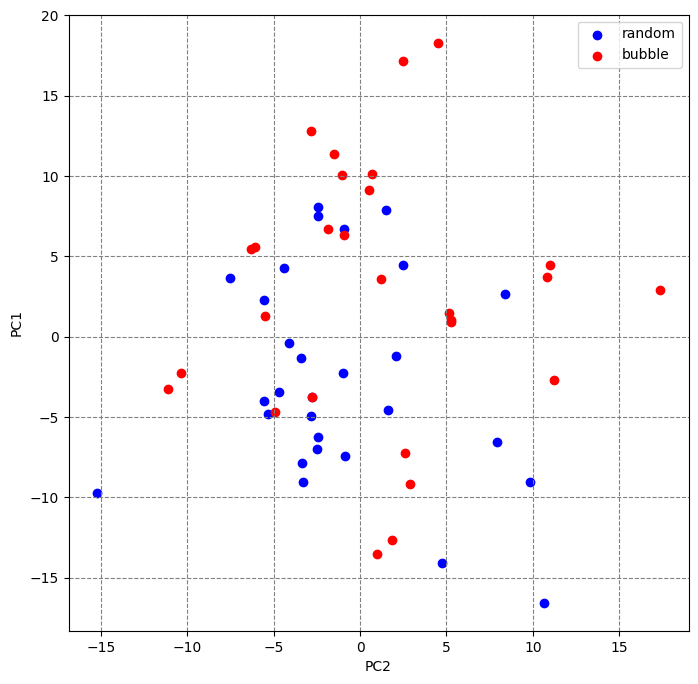

In [36]:
plt.figure(figsize=(8, 8))
plt.scatter(existing_df_2d.loc[:len(random_region_latent), "PC2"], existing_df_2d.loc[:len(random_region_latent), "PC1"] ,color="b", label="random")
plt.scatter(existing_df_2d.loc[len(bubble_region_latent):, "PC2"], existing_df_2d.loc[len(bubble_region_latent):, "PC1"] ,color="r", label="bubble")

plt.ylabel("PC1")
plt.xlabel("PC2")

plt.legend()
plt.grid(linestyle="--", color="grey")

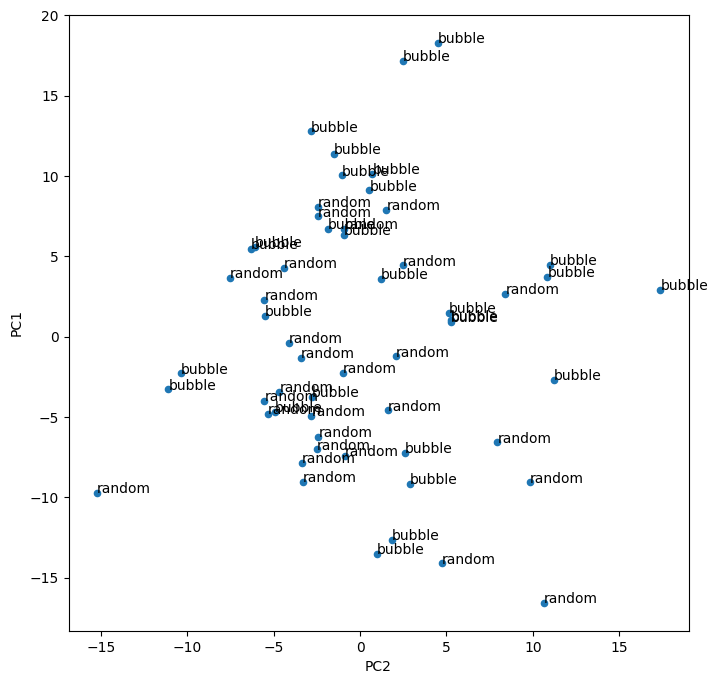

In [34]:
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(8,8))

for i, ano in enumerate(annotate):
    ax.annotate(ano,(existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))